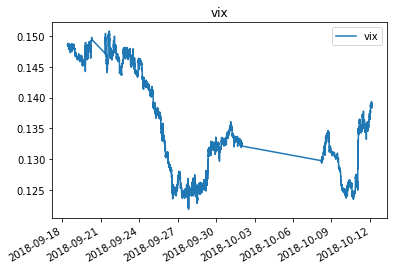

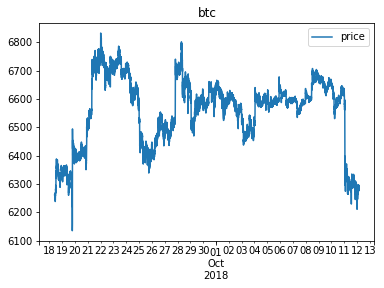

In [7]:
from influxdb import InfluxDBClient
#uat NLCpx6CimxWPpzQTC23Ep6jl
#sit ratepassword
client = InfluxDBClient(host='host.docker.internal', port=8080, username='rate', password='NLCpx6CimxWPpzQTC23Ep6jl', database='rate')
vix_rs = client.query(
    'select * from "qdc_candles_1m" where exchange=\'{exchange}\' and symbol=\'{symbol}\' and (time>=1536412680000000000)'.format(exchange='coinpool', symbol='VIX'), epoch='s')
btc_rs = client.query(
    'select * from "qdc_candles_1m" where exchange=\'{exchange}\' and symbol=\'{symbol}\' and (time>=1536412680000000000)'.format(exchange='binance', symbol='BTC/USDT'), epoch='s')
vix_rs = list(vix_rs)[0]
btc_rs = list(btc_rs)[0]
import pandas as pd
from datetime import datetime
vix = pd.DataFrame([{'vix':i['c']} for i in vix_rs], index=[i['time'] for i in vix_rs])
vix.index = pd.to_datetime([datetime.fromtimestamp(t) for t in vix.index])
btc = pd.DataFrame([{'price':i['c']} for i in btc_rs], index=[i['time'] for i in btc_rs])
btc.index = pd.to_datetime([datetime.fromtimestamp(t) for t in btc.index])
vix.plot(title='vix')
btc.plot(title='btc')

In [ ]:
vix[]